<a href="https://colab.research.google.com/github/NguyenQuanManh/TTNT/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Food_Manh/Train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1272 images belonging to 11 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Food_Manh/Validation',
                                          target_size=(150,150), batch_size=32, class_mode='categorical')

Found 396 images belonging to 11 classes.


In [ ]:
print(training_set.class_indices,validation.class_indices)

{'Banh bot loc': 0, 'Banh cuon': 1, 'Banh khot': 2, 'Banh mi': 3, 'Banh pia': 4, 'Banh tet': 5, 'Banh xeo': 6, 'Bun dau mam tom': 7, 'Com tam': 8, 'Nem': 9, 'Pho': 10} {'Banh bot loc': 0, 'Banh cuon': 1, 'Banh khot': 2, 'Banh mi': 3, 'Banh pia': 4, 'Banh tet': 5, 'Banh xeo': 6, 'Bun dau mam tom': 7, 'Com tam': 8, 'Nem': 9, 'Pho': 10}


In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(11, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set, epochs=100, batch_size=128)

Epoch 1/100
40/40 [==============================] - 842s 21s/step - loss: 2.4022 - accuracy: 0.0943
Epoch 2/100
40/40 [==============================] - 27s 685ms/step - loss: 2.3948 - accuracy: 0.1132
Epoch 3/100
40/40 [==============================] - 28s 685ms/step - loss: 2.3894 - accuracy: 0.1140
Epoch 4/100
40/40 [==============================] - 28s 688ms/step - loss: 2.3614 - accuracy: 0.1344
Epoch 5/100
40/40 [==============================] - 27s 657ms/step - loss: 2.2874 - accuracy: 0.1690
Epoch 6/100
40/40 [==============================] - 27s 681ms/step - loss: 2.2398 - accuracy: 0.1769
Epoch 7/100
40/40 [==============================] - 28s 679ms/step - loss: 2.2008 - accuracy: 0.2020
Epoch 8/100
40/40 [==============================] - 29s 706ms/step - loss: 2.1745 - accuracy: 0.2186
Epoch 9/100
40/40 [==============================] - 27s 687ms/step - loss: 2.1238 - accuracy: 0.2461
Epoch 10/100
40/40 [==============================] - 28s 691ms/step - loss: 2.0970

In [ ]:
model.save('food.h5')

In [ ]:
model_food=load_model('/content/food.h5')

1/1 [==============================] - 0s 15ms/step
[[5.5868113e-01 1.8883949e-02 2.4661568e-01 1.1346272e-01 2.8740600e-04
  4.5578266e-03 2.7291100e-03 2.6735730e-02 5.2640652e-03 2.1052005e-02
  1.7304699e-03]]
This is : banh bot loc


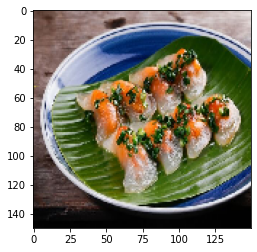

1/1 [==============================] - 0s 16ms/step
[[1.5698217e-13 4.6991122e-06 6.1755201e-09 9.9996090e-01 2.9326852e-09
  2.8253925e-12 2.4200139e-05 3.1877650e-07 6.5220581e-07 3.6446711e-06
  5.5781893e-06]]
This is : banh mi


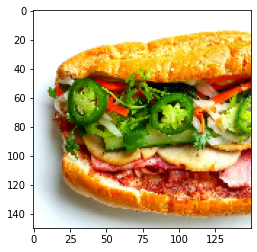

1/1 [==============================] - 0s 15ms/step
[[4.2090989e-03 4.6279118e-03 2.0163564e-02 8.6819910e-02 6.5610808e-01
  1.8182693e-01 3.1028429e-02 1.5586308e-03 5.2015963e-03 8.3151450e-03
  1.4067118e-04]]
This is : banh pia


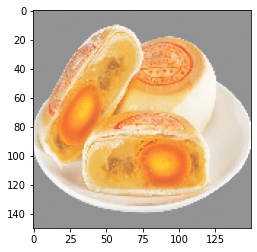

1/1 [==============================] - 0s 18ms/step
[[9.33407840e-09 1.40444065e-08 1.31282106e-03 6.40999289e-08
  8.19341324e-07 3.73841635e-06 9.98136044e-01 5.13528939e-04
  2.93557514e-05 3.63487425e-06 7.36143698e-12]]
This is : banh xeo


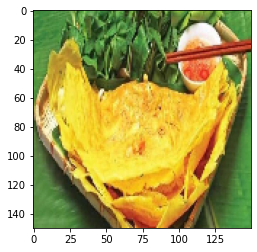

1/1 [==============================] - 0s 15ms/step
[[3.9116436e-05 5.2198514e-02 4.5220986e-05 3.4425041e-04 1.7390148e-04
  7.2979467e-04 9.9503159e-06 7.8248134e-04 9.4469923e-01 9.7882294e-05
  8.7964954e-04]]
This is : com tam


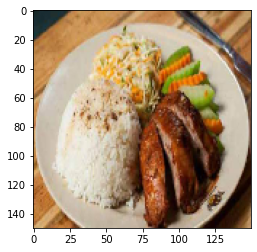

1/1 [==============================] - 0s 16ms/step
[[9.3529634e-05 1.1324104e-04 4.3200069e-07 3.5441255e-07 2.9459358e-07
  1.1907612e-04 3.0981519e-04 8.1597529e-05 6.7667565e-07 9.9906009e-01
  2.2077543e-04]]
This is : nem


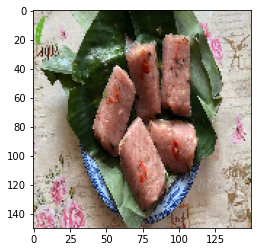

1/1 [==============================] - 0s 15ms/step
[[2.1583857e-03 9.8795819e-01 7.0874754e-05 3.0651299e-06 2.1047497e-03
  1.0027958e-03 6.9926231e-04 1.0319826e-03 3.1648234e-03 4.6791462e-05
  1.7590177e-03]]
This is : banh cuon


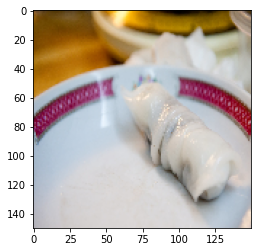

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/data/Food_Manh/Test/Test1"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_food.predict(img)
  class_name=['banh bot loc','banh cuon','banh khot','banh mi','banh pia','banh tet','banh xeo','bun dau mam tom','com tam',
            'nem','pho']
  print(model.predict(img))
  a= int(np.argmax(result,axis=1))
  print("This is :", class_name[a])
  plt.show()

In [ ]:
! jupyter nbconvert --to html /content/Food.ipynb

[NbConvertApp] Converting notebook /content/Food.ipynb to html
[NbConvertApp] Writing 1186876 bytes to /content/Food.html
